In [2]:
pip install -r requirements-inv.txt

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import standard libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os  # Optional, for file handling

# Suppress warnings (optional, if needed)
import warnings
warnings.filterwarnings('ignore')

# Ensure plots are displayed in Jupyter Notebook (optional for Jupyter users)
%matplotlib inline

Model Performance Comparison:
                           Dataset       MSE      RMSE       MAE        MAPE  \
0     Linear Regression (Training)  0.039344  0.198354  0.142481   64.808979   
1   Linear Regression (Validation)  0.039219  0.198038  0.139619   56.015551   
2         Linear Regression (Test)  0.038188  0.195417  0.142315   71.071822   
3      Ridge Regression (Training)  0.039350  0.198369  0.142413   64.694293   
4    Ridge Regression (Validation)  0.039272  0.198170  0.139752   55.975274   
5          Ridge Regression (Test)  0.038197  0.195441  0.142326   71.076351   
6      Lasso Regression (Training)  0.992398  0.996192  0.840837  101.608349   
7    Lasso Regression (Validation)  1.007339  1.003663  0.848168  102.507833   
8          Lasso Regression (Test)  1.024171  1.012013  0.862794  101.959191   
9         Random Forest (Training)  0.013791  0.117436  0.075049   42.906166   
10      Random Forest (Validation)  0.026889  0.163979  0.106747   54.096322   
11        

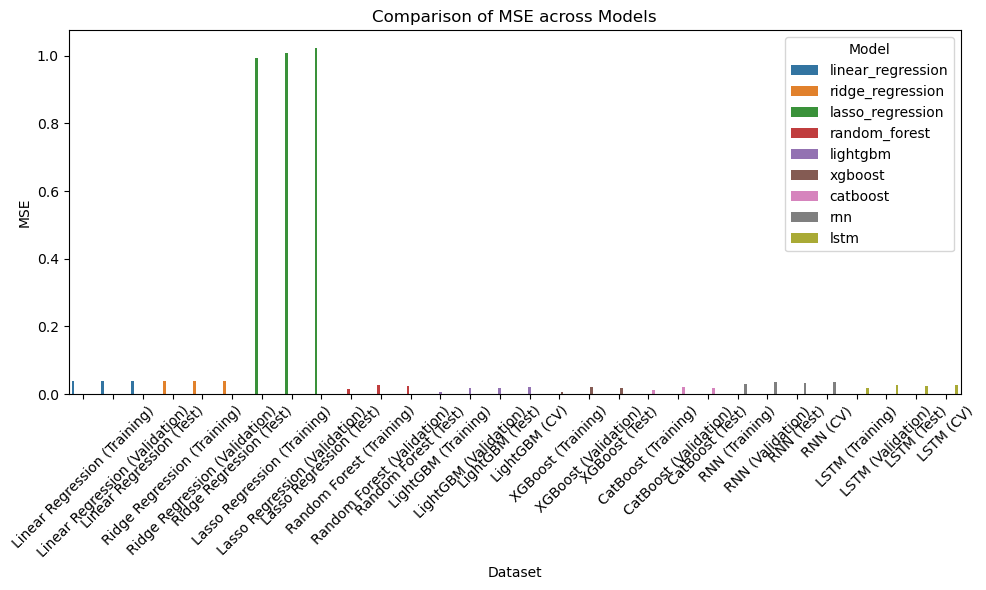

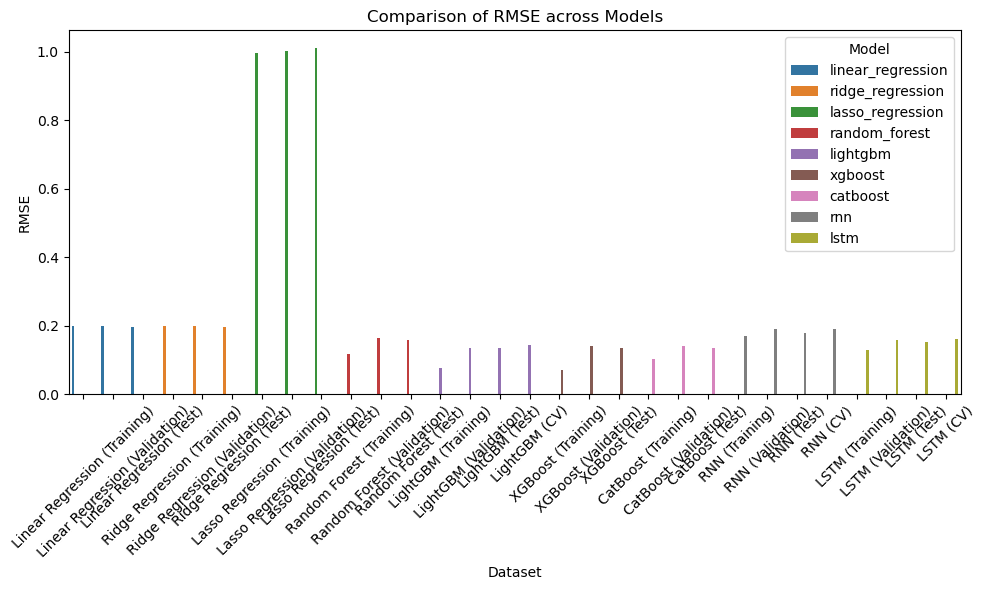

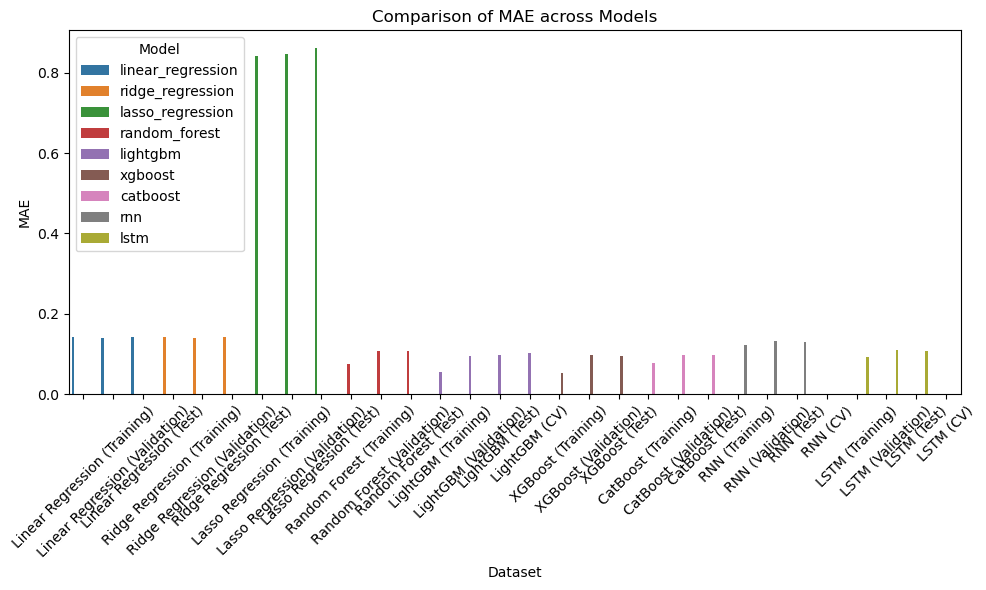

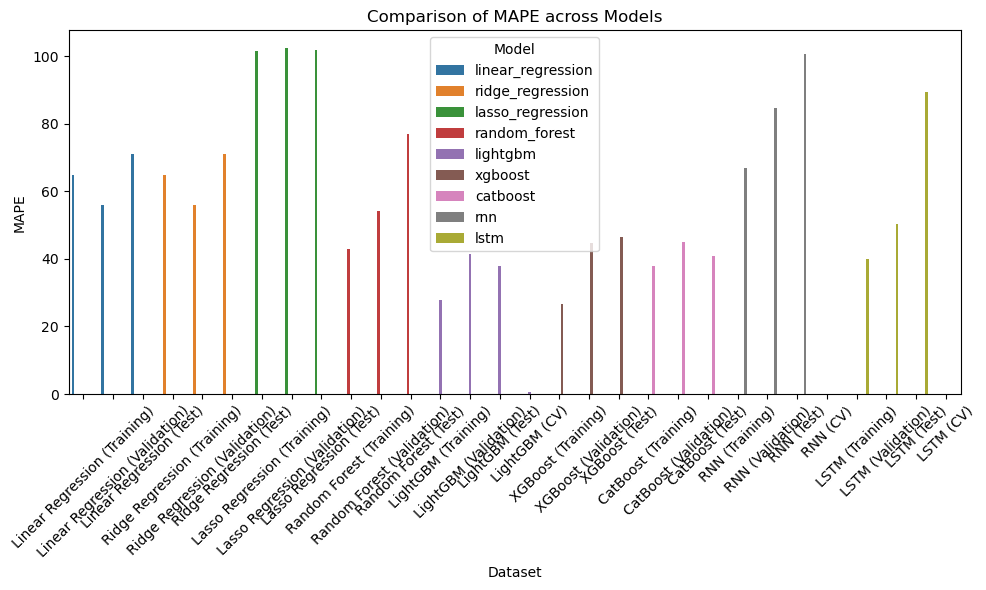

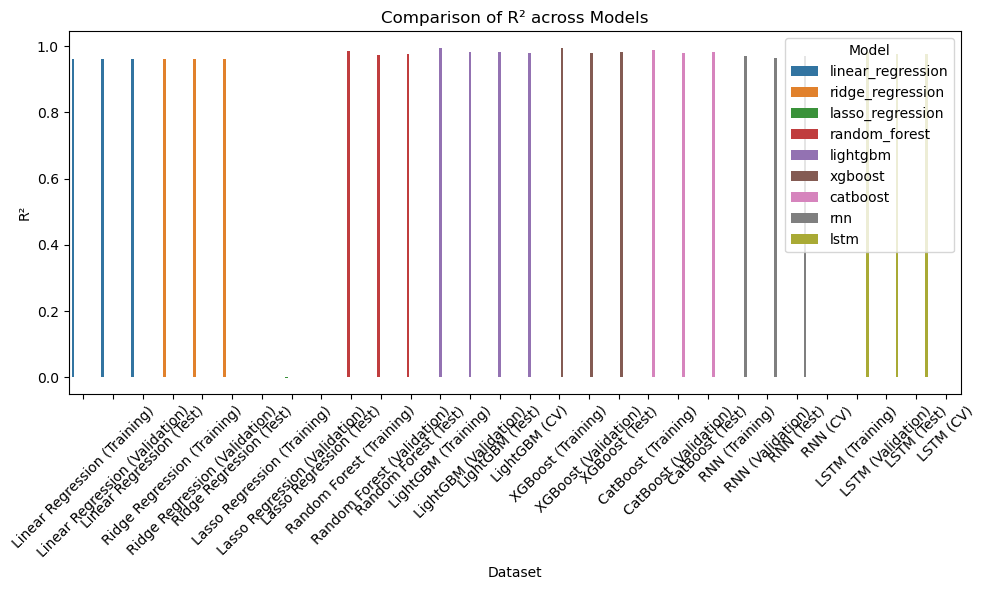

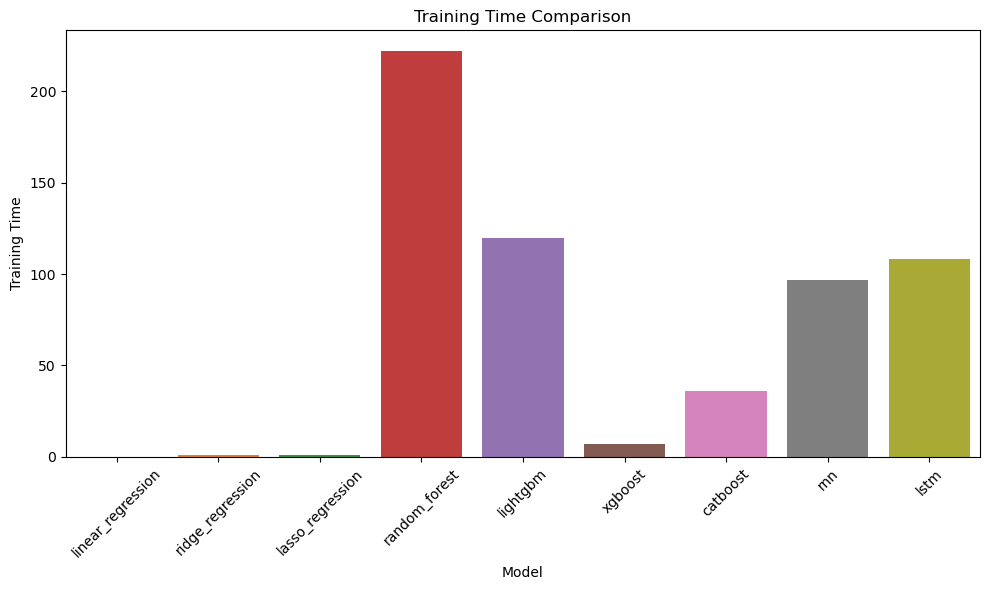

In [4]:
# Function to read results from CSV files
def read_results(files):
    results = []
    for file in files:
        df = pd.read_csv(file)
        model_name = file.split('_results')[0]  # Extract model name from file name
        df['Model'] = model_name
        results.extend(df.to_dict('records'))
    return results

# Function to plot model metrics
def plot_metrics(results):
    df = pd.DataFrame(results)
    metrics = ['MSE', 'RMSE', 'MAE', 'MAPE', 'R²']
    
    for metric in metrics:
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Dataset', y=metric, hue='Model', data=df)
        plt.title(f'Comparison of {metric} across Models')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# Function to plot training time
def plot_timing(results):
    df = pd.DataFrame(results)
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Model', y='Training Time', data=df)
    plt.title('Training Time Comparison')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Main function to run the code
def main():
    # List of result files
    result_files = [
        'linear_regression_results.csv',
        'ridge_regression_results.csv',
        'lasso_regression_results.csv',
        'random_forest_results.csv',
        'lightgbm_results.csv',
        'xgboost_results.csv',
        'catboost_results.csv',
        'rnn_results.csv',
        'lstm_results.csv'
    ]
    
    results = read_results(result_files)

    print("Model Performance Comparison:")
    print(pd.DataFrame(results))

    plot_metrics(results)
    plot_timing(results)

if __name__ == "__main__":
    main()